**Práctica de Criptografía**
*David Gómez Cañego*


Aquí he instalado la librería “cryptography”


In [ ]:
!pip install cryptography

EJERCICIO 1

In [ ]:
from cryptography.hazmat.primitives.ciphers.aead import ChaCha20Poly1305

# Clave simulada de 32 bytes
clave = b'\x01' * 32

# Nonce de 12 bytes (ChaCha20-Poly1305 usa 12 bytes)
nonce = b'9Yccn/f5nJJh'

# Texto a cifrar (string normal, con UTF-8)
texto = "KeepCoding te enseña a codificar y a cifrar".encode('utf-8')

# Crear objeto ChaCha20-Poly1305
chacha = ChaCha20Poly1305(clave)

# Cifrar
ciphertext = chacha.encrypt(nonce, texto, associated_data=None)

print("Texto cifrado + MAC (hex):", ciphertext.hex())

# Para descifrar y verificar integridad:
try:
    plaintext = chacha.decrypt(nonce, ciphertext, associated_data=None)
    print("Texto descifrado:", plaintext.decode('utf-8'))
except Exception as e:
    print("Error, integridad comprometida:", e)


Texto cifrado + MAC (hex): 8adcff5d23197afc61ec16df9ae38db00946ec514612ca055415802fdadd77838d440b7256c303a95d296e8a2391694fd5b9b0de25373e2f4f3c93f9
Texto descifrado: KeepCoding te enseña a codificar y a cifrar


EJERCICIO 2 x923

In [ ]:
!pip install pycryptodome



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.9 MB/s eta 0:00:00


In [ ]:
#Descifrado con x923

import json
from base64 import b64encode, b64decode
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
claveC = "TQ9SOMKc6aFS9SlxhfK9wT18UXpPCd505Xf5J/5nLI7Of/o0QKIWXg3nu1RRz4QWElezdrLAD5LO4USt3aB/i50nvvJbBiG+le1ZhpR84oI="

#claveC = clave Hexadecimal
#claveP = Clave AES-256 la del keystorePractica
#AES/CBC el IV tiene que ser de 16bytes

claveP = "A2CFF885901A5449E9C448BA5B948A8C4EE377152B3F1ACFA0148FB3A426DB72"
clave = bytes.fromhex(claveP)
iv_desc_bytes = bytes.fromhex("00000000000000000000000000000000")#128bits = 16bytes "Explicacion de clase  AES 128bits/8 16 bytes 16letras por bloque de 128bits"
texto_cifrado_bytes = b64decode(claveC)
cipher = AES.new(clave, AES.MODE_CBC, iv_desc_bytes)
mensaje_des_bytes = unpad(cipher.decrypt(texto_cifrado_bytes), AES.block_size,"x923")
print("El texto en claro es: ", mensaje_des_bytes.decode("utf-8"))

#¿Qué ocurre si decidimos cambiar el padding a x923 en el descifrado?
# Da el mismo resultado.

El texto en claro es:  Esto es un cifrado en bloque típico. Recuerda, vas por el buen camino. Ánimo.


EJERCICIO 3

Con caracteres no ASCII

In [ ]:
from Crypto.Cipher import ChaCha20_Poly1305
from base64 import b64decode, b64encode

# Texto a cifrar (con caracteres no ASCII)
textoPlano = 'KeepCoding te enseña a codificar y a cifrar'.encode('utf-8')

clave = bytes.fromhex('AF9DF30474898787A45605CCB9B936D33B780D03CABC81719D52383480DC3120')

nonce_mensaje = b64decode('9Yccn/f5nJJhAt2S')
datos_asociados = b''

cipher = ChaCha20_Poly1305.new(key=clave, nonce=nonce_mensaje)
cipher.update(datos_asociados)

texto_cifrado, tag = cipher.encrypt_and_digest(textoPlano)

print("nonce:", b64encode(nonce_mensaje).decode())
print("Datos asociados:", b64encode(datos_asociados).decode())
print("Texto cifrado:", b64encode(texto_cifrado).decode())
print("MAC/Tag:", b64encode(tag).decode())



nonce: 9Yccn/f5nJJhAt2S
Datos asociados: 
Texto cifrado: TslZIcqLdX4jNmBcfbq49NQLW00iDmaql490DT5ZsM1w4yFyQpkcwUC7Hho=
MAC/Tag: cQzUcj2m1e838jvuZiheVw==


Con caracteres ASCII

In [ ]:
from Crypto.Cipher import ChaCha20_Poly1305
from Crypto.Random import get_random_bytes
from base64 import b64encode

# Texto plano con acentos y ñ
textoPlano = 'KeepCoding te enseña a codificar y a cifrar'.encode('utf-8')
# Clave de 32 bytes (256 bits)
clave = bytes.fromhex('AF9DF30474898787A45605CCB9B936D33B780D03CABC81719D52383480DC3120')
# Generar un nonce único de 12 bytes
nonce_mensaje = get_random_bytes(12)
# Datos asociados
datos_asociados = b''
# Cifrador
cipher = ChaCha20_Poly1305.new(key=clave, nonce=nonce_mensaje)
cipher.update(datos_asociados)
# Cifrar y generar tag
texto_cifrado, tag = cipher.encrypt_and_digest(textoPlano)

# Mostrar resultados
print("nonce:", b64encode(nonce_mensaje).decode())
print("Datos asociados:", b64encode(datos_asociados).decode())
print("Texto cifrado:", b64encode(texto_cifrado).decode())
print("MAC/Tag:", b64encode(tag).decode())

nonce: arM5D6EjwGODGsZ2
Datos asociados: 
Texto cifrado: sN9X1lMIki2Jbwu5j09vCPCgsDTMnvOq77I9CMtg69rFjxEC+2vcyNbPrio=
MAC/Tag: ylso4ocfmrd/rrTHuzirAg==


In [ ]:
from Crypto.Cipher import ChaCha20

from base64 import b64decode, b64encode

textoPlano = bytes('KeepCoding te enseña a codificar y a cifrar', 'UTF-8')

#Se usa 256 bits que se transforman en 64 caracteres hexadecimales
clave = bytes.fromhex('AF9DF30474898787A45605CCB9B936D33B780D03CABC81719D52383480DC3120')
nonce_mensaje = b64decode('9Yccn/f5nJJhAt2S')
print("nonce = ", nonce_mensaje.hex())
#El nonce debe ser único
cipher = ChaCha20.new(key=clave, nonce=nonce_mensaje)
texto_cifrado = cipher.encrypt(textoPlano)

print('Mensaje cifrado en HEX = ', texto_cifrado.hex())

nonce =  f5871c9ff7f99c926102dd92
Mensaje cifrado en HEX =  69ac4ee7c4c552537a00a19bcaf7f0aaed7c9c8f769956a09bce6fadef6c3535f2211c9467067cf5c4a842ab


EJERCICIO 4

Al intentar validar el token hackeado con PyJWT usando la clave real ‘Con KeepCoding aprendemos’, PyJWT detecta que la firma no coincide con el contenido alterado y devuelve un InvalidSignatureError. Hasta ahora no he conseguido resultados.

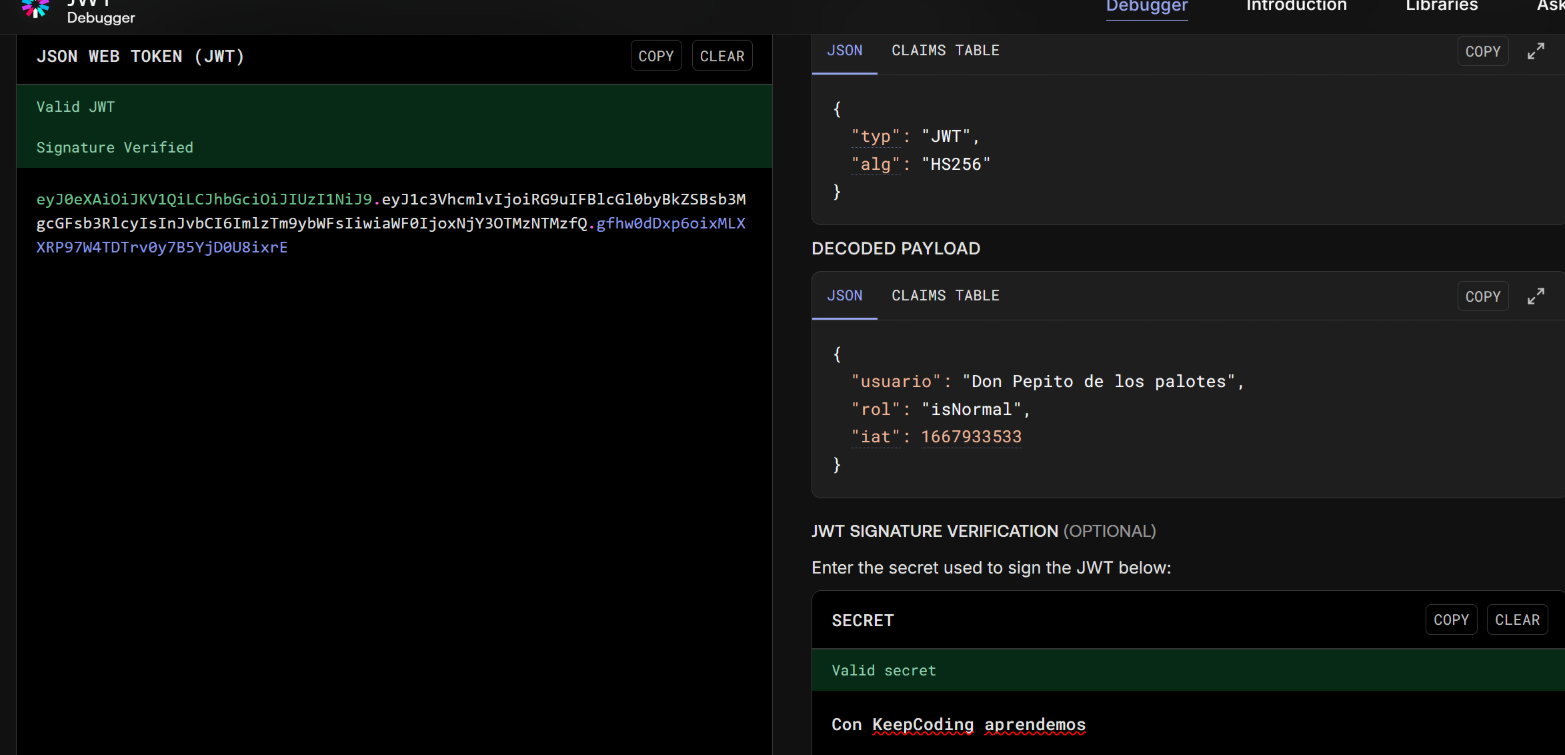

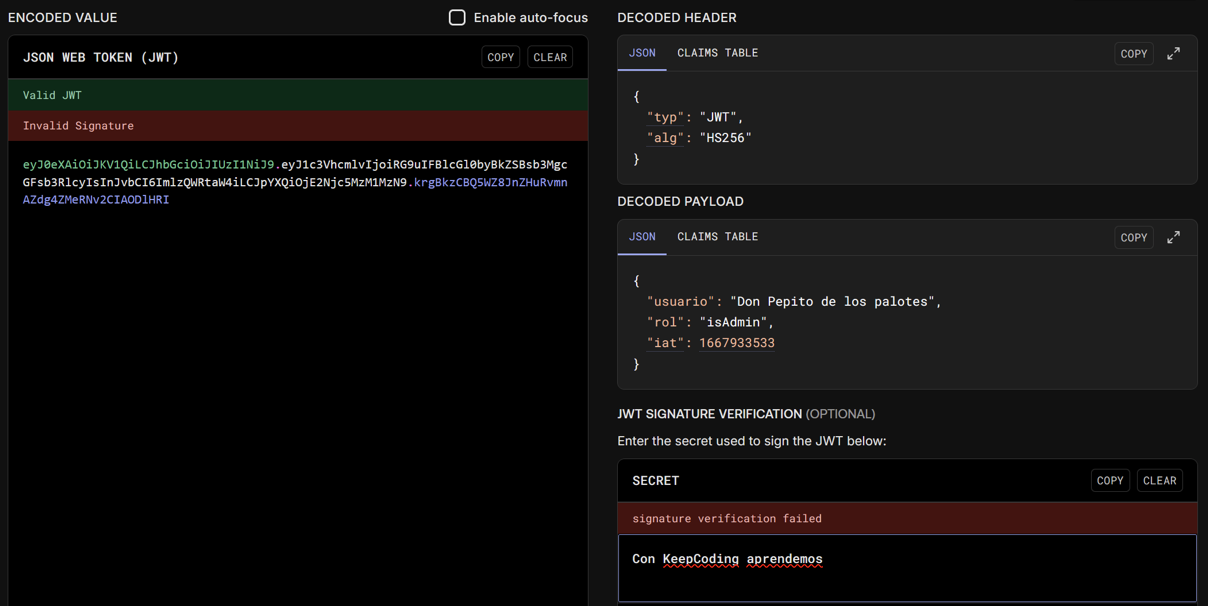

**EJERCICIO 6**

He calculado el HMAC‑SHA256 del texto usando la clave del Keystore en Python (Colab), asegurando la codificación UTF‑8 para los caracteres especiales.
El resultado se muestra en hexadecimal dejando ver el mensaje.
Esta operación garantiza que cualquier modificación del texto se detectaría al validar el HMAC.

In [ ]:
import hmac
import hashlib

# Texto a firmar
mensaje = "Siempre existe más de una forma de hacerlo, y más de una solución válida."

# Clave (texto normal)
clave = b"123456"  # siempre en bytes

# Calculamos HMAC-SHA256
h = hmac.new(clave, mensaje.encode('utf-8'), hashlib.sha256)

# Mostramos en hexadecimal
print(h.hexdigest())


a668cb6927edc31a518da2fd2d6dc34fa6ea7726f904d4a274f0d9733e130b20


El código para calcular el HMAC‑SHA256 lo he escrito en Python en Google Colab basándome en ejemplos de documentación y tutoriales de criptografía adaptándolo a la clave y texto del ejercicio después.

El objetivo era evidenciar el cálculo y mostrar el resultado en hexadecimal para así asegurar la integridad del mensaje.

**EJERCICIO 9**

He descargado esta librería para poder usar las funciones de cifrado y hashing directamente y así obtener los valores de control correctamente.

In [ ]:
!pip install pycryptodome


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.1 MB/s eta 0:00:00


In [ ]:
from Crypto.Cipher import AES
from Crypto.Hash import SHA256

# Clave AES que queremos calcular el KCV
clave_hex = "A2CFF885901A5449E9C448BA5B948A8C4EE377152B3F1ACFA0148FB3A426DB72"
clave_bytes = bytes.fromhex(clave_hex)

# SHA-256

hash_sha = SHA256.new(clave_bytes).digest()
kcv_sha256 = hash_sha[:3]  # primeros 3 bytes
print("KCV (SHA-256):", kcv_sha256.hex())

# AES

# Bloque de 16 bytes de ceros
texto = bytes([0]*16)
# IV de 16 bytes de ceros
iv = bytes([0]*16)

# Cifrador AES en modo CBC
cipher = AES.new(clave_bytes[:32], AES.MODE_CBC, iv)  # Usamos los primeros 32 bytes si la clave es >256 bits
kcv_aes = cipher.encrypt(texto)
print("KCV (AES):", kcv_aes.hex()[:6])


KCV (SHA-256): db7df2
KCV (AES): 5244db


**EJERCICIO 10**

Para verificar la firma PGP de Pedro he utilizado “Pedro-publ.txt” con la herramienta GnuPG, luego en Colab he ejecutado la verificación del fichero .sig asociado al mensaje. La verificación ha sido buena, lo que confirma que el mensaje proviene de Pedro y no ha sido modificado.

Para simular la actuación del departamento de RRHH he firmado el mensaje utilizando “RRHH-priv.txt” La firma generada permite a cualquier receptor comprobar que el mensaje procede de RRHH usando la clave pública.

Por último he cifrado el mensaje final utilizando la clave pública de RRHH y la de Pedro a la vez, así cualquiera de los dos puede descifrarlo. Usando PGP estándar (GnuPG), generando un mensaje cifrado en formato ASCII Armor listo para que se comparta.

Una de las contraseñas es 11111234 (No pude poner otra debido a un error que tuve con otra clave)


In [ ]:
!pip install pgpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.0/603.0 kB 15.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pgpy: filename=pgpy-0.6.0-py3-none-any.whl size=84182 sha256=ee3c57c55eca432ffd3bfd93299e491d2a085333c2dc79d4ef459b7ec5b1064c
  Stored in directory: /root/.cache/pip/wheels/15/d7/4b/ae2b815f6dad91c0fc911270fead8e02a1d6144f214453b1e5
Successfully built pgpy


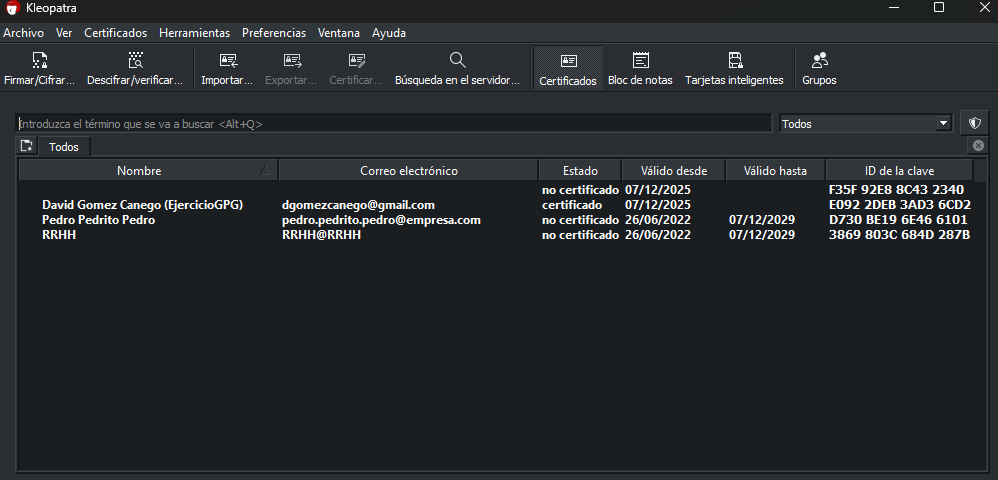

**EJERCICIO 11**

In [ ]:
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving clave-rsa-oaep-priv.pem to clave-rsa-oaep-priv.pem
Saving clave-rsa-oaep-publ.pem to clave-rsa-oaep-publ.pem


In [ ]:
# Clave Privada
with open("/content/clave-rsa-oaep-priv.pem", "rb") as key_file:
    private_key = serialization.load_pem_private_key(
        key_file.read(),
        password=None
    )

# Clave Pública
with open("/content/clave-rsa-oaep-publ.pem", "rb") as key_file:
    public_key = serialization.load_pem_public_key(
        key_file.read()
    )

In [ ]:
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding

# Cargar clave privada
with open("/content/clave-rsa-oaep-priv.pem", "rb") as key_file:
    private_key = serialization.load_pem_private_key(
        key_file.read(),
        password=None
    )

# Cargar clave pública
with open("/content/clave-rsa-oaep-publ.pem", "rb") as key_file:
    public_key = serialization.load_pem_public_key(
        key_file.read()
    )

# Mensaje cifrado (hex)
hex_ciphertext = """
b72e6fd48155f565dd2684df3ffa8746d649b11f0ed4637fc4c99d18283b32e1709b30c
96b4a8a20d5dbc639e9d83a53681e6d96f76a0e4c279f0dffa76a329d04e3d3d4ad629
793eb00cc76d10fc00475eb76bfbc1273303882609957c4c0ae2c4f5ba670a4126f2f14
a9f4b6f41aa2edba01b4bd586624659fca82f5b4970186502de8624071be78ccef573d
896b8eac86f5d43ca7b10b59be4acf8f8e0498a455da04f67d3f98b4cd907f27639f4b1
df3c50e05d5bf63768088226e2a9177485c54f72407fdf358fe64479677d8296ad38c6f
177ea7cb74927651cf24b01dee27895d4f05fb5c161957845cd1b5848ed64ed3b0372
2b21a526a6e447cb8ee
"""

ciphertext_bytes = bytes.fromhex("".join(hex_ciphertext.split()))

# Descifrar
plaintext = private_key.decrypt(
    ciphertext_bytes,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

print("Texto descifrado (bytes):", plaintext)

# Volver a cifrar con la clave pública
new_ciphertext = public_key.encrypt(
    plaintext,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

print("Texto cifrado nuevamente (hex):", new_ciphertext.hex())


Texto descifrado (bytes): b'\xe2\xcf\xf8\x85\x90\x1aTI\xe9\xc4H\xba[\x94\x8a\x8cN\xe3w\x15+?\x1a\xcf\xa0\x14\x8f\xb3\xa4&\xdbr'
Texto cifrado nuevamente (hex): a961d913459e0bb09dafe26b679b8704887c96989e7c18974125b41c8adaf2040635ea96aa576690974336c2810c1489a3745a0f2d21dbc0f59a6b9499cc59891d438ec4ef224a243272a54fae4ac35e083a684c5e313227a02bdee18789fa5410a4b5c498a41c4511a9b4f6170014869bdb4a8b2e0d846d6f19efbf8f8d8b3cbe878375145a5ebc1d539390dc386ab2a90791730225ce686084d1a733bf52a53ad8f1da1de4d18c4315c555b669caf53579b80f29e02c9ecc9067f8075d9275b3a28103f9938d17ba2b10d0c132ec78d77404a7be189851a502d4df7f1b4c22d5adf7278465dc75051f09853e4bda9152b267a6b4215276bcb003c85724d366


**EJERCICIO 12**

He usado AES en modo GCM para cifrar de forma simétrica. Se convierte la clave de hex a bytes y se adapta el nonce a los 12 bytes de AES-GCM. El mensaje se cifra generando un tag de autenticación para integridad y autenticidad. Salen los resultados en hex y base64 para la verificación y compatibilidad con otros sistemas, o al menos diferentes sistemas.

Con esto se puede evitar repetir IVs y asegurando que la comunicación sea segura frente a ataques de repeticiónes o manipulación de datos.

In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import base64
from Crypto.Random import get_random_bytes

# Datos
key_hex = "E2CFF885901B3449E9C448BA5B948A8C4EE322152B3F1ACFA0148FB3A426DB74"
plaintext = "He descubierto el error y no volveré a hacerlo mal"

# Convertir clave a bytes
key = bytes.fromhex(key_hex)

# Generar nonce único de 12 bytes
nonce = get_random_bytes(12)

# Crear cifrador AES-GCM
aesgcm = Cipher(algorithms.AES(key), modes.GCM(nonce), backend=default_backend()).encryptor()

# Cifrar
ciphertext = aesgcm.update(plaintext.encode('utf-8')) + aesgcm.finalize()

# Tag de autenticación
tag = aesgcm.tag

# Mostrar resultados
print("Nonce (hex):", nonce.hex())
print("Texto cifrado (hex):", ciphertext.hex())
print("Texto cifrado (base64):", base64.b64encode(ciphertext).decode())
print("Tag de autenticación (hex):", tag.hex())


Nonce (hex): 2b9599c7f72a4b43b33352e5
Texto cifrado (hex): 8556081ac5c9b4af63dda5dc5c6375ae71ffd51f1ec3d75381594c94b97c74e1b4a8d824890adf543281810b88c83127cde2bf
Texto cifrado (base64): hVYIGsXJtK9j3aXcXGN1rnH/1R8ew9dTgVlMlLl8dOG0qNgkiQrfVDKBgQuIyDEnzeK/
Tag de autenticación (hex): 285a93b0e61a3de08a79f7855635e265


**EJERCICIO 13**

Dejo una serie de comandos que he usado para corregir un error que tuve (Se me olvidó poner una "a" en "oaep"... y usé los comandos de abajo)

In [ ]:
!pip install pycryptodome


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving clave-rsa-oaep-priv.pem to clave-rsa-oaep-priv (1).pem


In [ ]:
import os

os.rename("/content/clave-rsa-oaep-priv (1).pem", "/content/clave-rsa-oaep-priv.pem")


In [ ]:
!ls /content


clave-rsa-oaep-priv.pem  clave-rsa-oaep-publ.pem  sample_data


In [ ]:
import os
os.listdir("/content")

['.config',
 'clave-rsa-oaep-priv.pem',
 'clave-rsa-oaep-publ.pem',
 'clave-rsa-oaep-priv (1).pem',
 'sample_data']

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Signature.pkcs1_15 import PKCS115_SigScheme
from Crypto.Hash import SHA256
import os
# Cargamos clave Privada
my_path = os.path.abspath(os.getcwd())
path_file_priv = my_path + "/clave-rsa-oaep-priv.pem"
keypriv = RSA.import_key(open(path_file_priv).read())

# Mensaje
mensaje_bytes = bytes("El equipo está preparado para seguir con el proceso, necesitaremos más recursos.", "utf-8")
# Calculamos el hash del mensaje con SHA-256
hash = SHA256.new(mensaje_bytes)
# Generamos el firmador con PKCS#1 v1.5
firmador = PKCS115_SigScheme(keypriv)
# Firmamos el hash
firma = firmador.sign(hash)

# Resultado
print("Firma: ", firma.hex())

Firma:  a4606c518e0e2b443255e3626f3f23b77b9d5e1e4d6b3dcf90f7e118d6063950a23885c6dece92aa3d6eff2a72886b2552be969e11a4b7441bdeadc596c1b94e67a8f941ea998ef08b2cb3a925c959bcaae2ca9e6e60f95b989c709b9a0b90a0c69d9eaccd863bc924e70450ebbbb87369d721a9ec798fe66308e045417d0a56b86d84b305c555a0e766190d1ad0934a1befbbe031853277569f8383846d971d0daf05d023545d274f1bdd4b00e8954ba39dacc4a0875208f36d3c9207af096ea0f0d3baa752b48545a5d79cce0c2ebb6ff601d92978a33c1a8a707c1ae1470a09663acb6b9519391b61891bf5e06699aa0a0dbae21f0aaaa6f9b9d59f41928d


**EJERCICIO 14**

In [ ]:
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import hashes
import binascii

# Clave maestra del keystore (hex)
master_hex = "A2CFF885901A5449E9C448BA5B948A8C4EE377152B3F1ACFA0148FB3A426DB72"
master_key = binascii.unhexlify(master_hex)

# Identificador del dispositivo (hex) = SALT
device_hex = "e43bb4067cbcfab3bec54437b84bef4623e345682d89de9948fbb0afedc461a3"
salt = binascii.unhexlify(device_hex)

# HKDF-SHA512 para generar AES-256
hkdf = HKDF(
    algorithm=hashes.SHA512(),
    length=32,      # 32 bytes = AES-256
    salt=salt,
    info=b"",
)

derived_key = hkdf.derive(master_key)
print("Clave derivada (hex):", derived_key.hex())



Clave derivada (hex): e716754c67614c53bd9bab176022c952a08e56f07744d6c9edb8c934f52e448a


**EJERCICIO 15**

El bloque TR-31 no debe modificarse nunca porque si se altera, deja de ser válido y por eso el código falla

Los datos usados KBPK/bloque no son correctos para hacer unwrap.

La clave importada tiene un valor de "C1C1C1C1C1C1C1C1C1C1C1C1C1C1C1C1" en Hexadecimal

In [ ]:
from psec import tr31

def importan():
    """Importa y muestra información de un Key Block TR-31"""
    kbpk_b = bytes.fromhex("A1A010101010101010101010101010102")
    kb_string = ("D01440DA0B005000042766B9265B2DF93A6E2E9B5813B77A2F616C8D515ACDB"
                 "E6A5626F79FA7B4071E9EE1423C6D7970FA2B965D1B8239225B8E25657495E0"
                 "3CD85F73D7018E111B")


    kb.header.load(kb_string)
    kb = tr31.KeyBlock(kbpk_b)
    clave_unwrapped = kb.unwrap(kb_string)

    print("*" * 60)
    print("INFORMACIÓN DEL KEY BLOCK TR-31")
    print("*" * 60)
    print(f"Clave importada (hex): {clave_unwrapped.hex().upper()}")
    print(f"Versión:                {kb.header.version_id}")
    print(f"Uso de clave:           {kb.header.key_usage}")
    print(f"Algoritmo:              {kb.header.algorithm}")
    print(f"Modo de uso:            {kb.header.mode_of_use}")
    print(f"Exportabilidad:         {kb.header.exportability}")
    print(f"Número de versión:      {kb.header.version_num}")
    print("*" * 60)


ModuleNotFoundError: No module named 'psec'

Otra prueba

In [ ]:
from psec import tr31

header, key = tr31.unwrap( kbpk=bytes.fromhex("A1A10101010101010101010101010102"), key_block="D0144D0AB00S000042766B9265B2DF93AE6E29B58135B77A2F616C8D515ACDBE6A5626F79FA7B4071E9EE1423C6D7970FA2B965D18B23922B5B2E5657495E03CD857FD37018E111B")
print(key.hex())

print("Key Version ID: " + header.version_id )
print("Algoritmo: " + header.algorithm)
print("Modo de uso: " + header.mode_of_use)
print("Uso de la clave: " + header.key_usage)
print("Exportabilidad: " + header.exportability)

ModuleNotFoundError: No module named 'psec'